In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib as mpl
from statsmodels.tsa.seasonal import seasonal_decompose


In [3]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [5]:
mpl.rcParams['figure.figsize']=(10,6)
mpl.rcParams['axes.grid']=False

In [4]:
df=pd.read_csv(csv_path)
# df.to_csv('weather.csv')

In [7]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [6]:
df.size

6308265

In [10]:
df.shape

(420551, 15)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),420551.0,989.212776,8.358481,913.60,984.20,989.58,994.72,1015.35
T (degC),420551.0,9.450147,8.423365,-23.01,3.36,9.42,15.47,37.28
Tpot (K),420551.0,283.492743,8.504471,250.60,277.43,283.47,289.53,311.34
Tdew (degC),420551.0,4.955854,6.730674,-25.01,0.24,5.22,10.07,23.11
rh (%),420551.0,76.008259,16.476175,12.95,65.21,79.30,89.40,100.00
VPmax (mbar),420551.0,13.576251,7.739020,0.95,7.78,11.82,17.60,63.77
VPact (mbar),420551.0,9.533756,4.184164,0.79,6.21,8.86,12.35,28.32
VPdef (mbar),420551.0,4.042412,4.896851,0.00,0.87,2.19,5.30,46.01
sh (g/kg),420551.0,6.022408,2.656139,0.50,3.92,5.59,7.80,18.13
H2OC (mmol/mol),420551.0,9.640223,4.235395,0.80,6.29,8.96,12.49,28.82


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [8]:
df_every_two_hours=df[11::12]
df_every_two_hours

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
35,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.70,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
47,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.80,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
59,01.01.2009 10:00:00,1000.27,-7.04,266.10,-8.17,91.60,3.60,3.30,0.30,2.05,3.29,1307.76,1.45,3.00,292.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420491,31.12.2016 14:10:00,1003.25,4.15,277.05,-3.76,56.20,8.22,4.62,3.60,2.87,4.61,1258.09,0.58,1.32,231.0
420503,31.12.2016 16:10:00,1002.54,2.44,275.40,-4.39,60.50,7.28,4.41,2.88,2.74,4.40,1265.12,0.46,1.08,177.2
420515,31.12.2016 18:10:00,1002.27,-0.42,272.56,-4.92,71.50,5.92,4.23,1.69,2.63,4.22,1278.14,0.44,1.00,232.8
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4


In [11]:
date_time=pd.to_datetime(df['Date Time'],format="%d.%m.%Y %H:%M:%S")

In [12]:
date_time

0        2009-01-01 00:10:00
1        2009-01-01 00:20:00
2        2009-01-01 00:30:00
3        2009-01-01 00:40:00
4        2009-01-01 00:50:00
                 ...        
420546   2016-12-31 23:20:00
420547   2016-12-31 23:30:00
420548   2016-12-31 23:40:00
420549   2016-12-31 23:50:00
420550   2017-01-01 00:00:00
Name: Date Time, Length: 420551, dtype: datetime64[ns]

In [19]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [20]:
df.index

RangeIndex(start=0, stop=420551, step=1)

array([<Axes: xlabel='Date Time'>, <Axes: xlabel='Date Time'>],
      dtype=object)

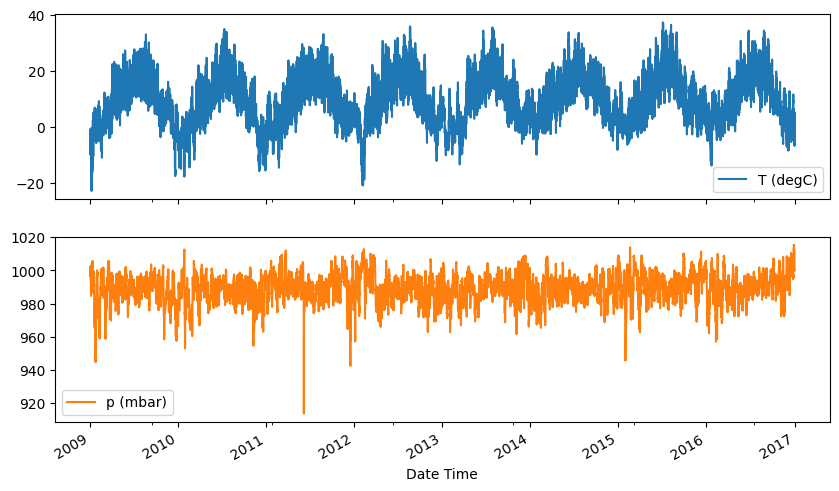

In [24]:
plot_columns=['T (degC)','p (mbar)']
plot_features=df[plot_columns]
plot_features.index=date_time
plot_features.plot(subplots=True)


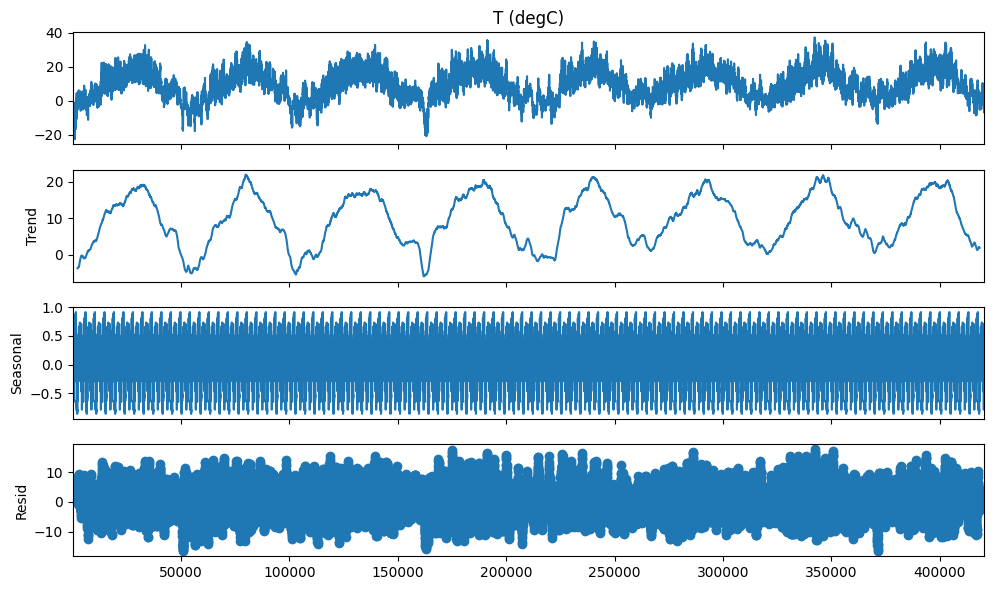

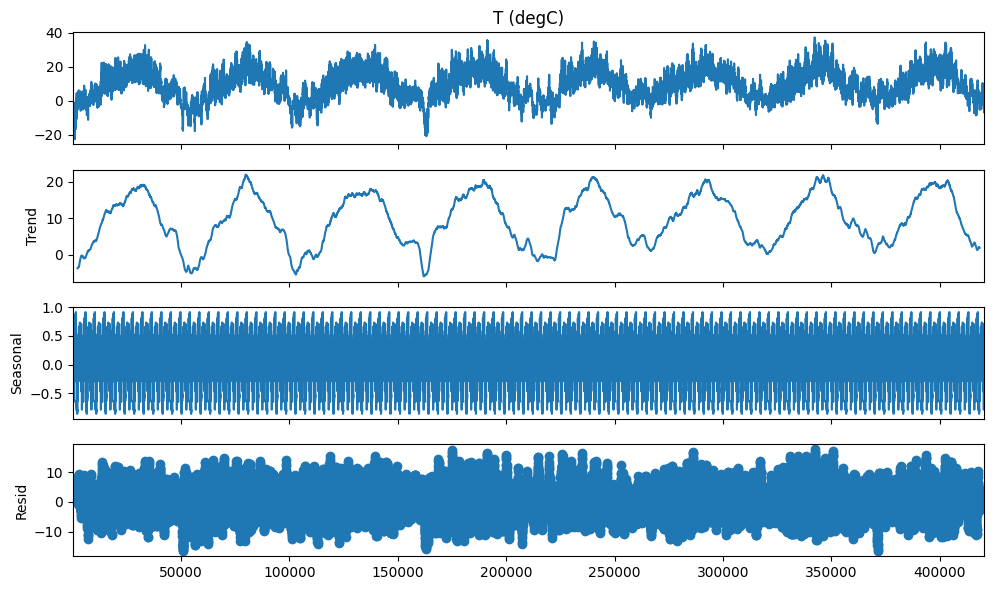

In [32]:
decompose=seasonal_decompose(df_every_two_hours['T (degC)'],model='additive',period=365)
decompose.plot()

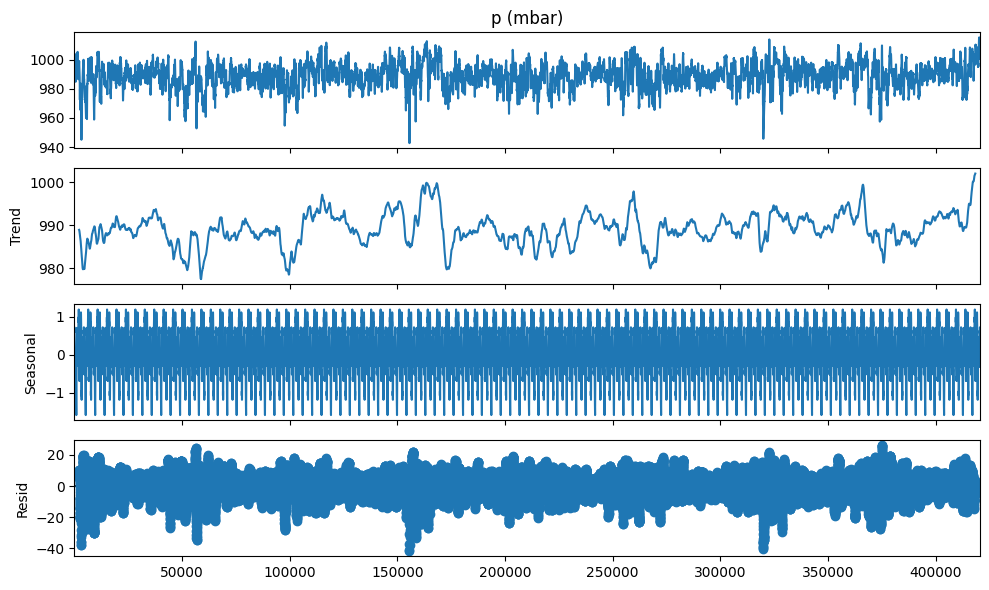

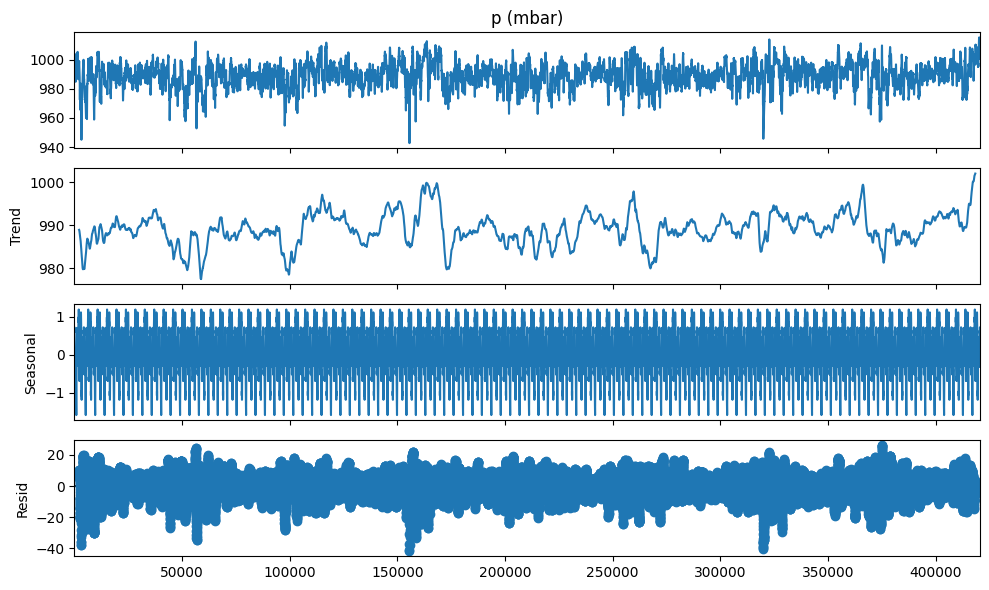

In [33]:
decompose=seasonal_decompose(df_every_two_hours['p (mbar)'],model='additive',period=365)
decompose.plot()

In [36]:
df.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [41]:
wv=df_every_two_hours['wv (m/s)']

wv[wv<0]=0
min(wv)

C:\Users\Singla\AppData\Local\Temp\ipykernel_18280\2479963317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wv[wv<0]=0


0.0

In [42]:
wv1=df_every_two_hours['max. wv (m/s)']

wv1[wv1<0]=0
min(wv1)

C:\Users\Singla\AppData\Local\Temp\ipykernel_18280\1030947586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wv1[wv1<0]=0


0.0

In [61]:
df_every_two_hours.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,35045.000000,35045.000000,35045.000000,35045.000000,35045.00000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000
mean,989.213079,9.450335,283.492908,4.955012,76.00602,13.577314,9.532714,4.044542,6.021744,9.639148,1216.063165,2.128639,3.532633,174.660533
std,8.353850,8.425301,8.506133,6.729168,16.48344,7.743076,4.181965,4.902793,2.654692,4.233082,39.978039,1.542289,2.343832,86.707469
min,942.650000,-22.500000,251.220000,-24.550000,13.88000,0.990000,0.830000,0.000000,0.520000,0.830000,1102.460000,0.000000,0.000000,0.000000
25%,984.200000,3.360000,277.440000,0.240000,65.15000,7.770000,6.220000,0.870000,3.920000,6.290000,1187.470000,0.990000,1.760000,125.200000
50%,989.570000,9.430000,283.480000,5.220000,79.30000,11.830000,8.860000,2.180000,5.600000,8.970000,1213.820000,1.760000,2.960000,198.100000
75%,994.720000,15.490000,289.550000,10.080000,89.50000,17.620000,12.360000,5.300000,7.810000,12.490000,1242.800000,2.840000,4.730000,233.600000
max,1015.160000,37.280000,311.210000,22.190000,100.00000,63.770000,26.790000,46.010000,17.130000,27.250000,1391.410000,13.500000,23.500000,360.000000


In [47]:
df_every_two_hours.shape

(35045, 15)

In [48]:
train_df=df_every_two_hours[:24500]
validate_df=df_every_two_hours[24500:31540]
test_df=df_every_two_hours[31540:]

In [50]:
train_df.shape

(24500, 15)

In [55]:
df_every_two_hours_after_drop=df_every_two_hours.drop(['Date Time'],axis=1)

In [56]:
df_every_two_hours_after_drop.shape

(35045, 14)

<Axes: >

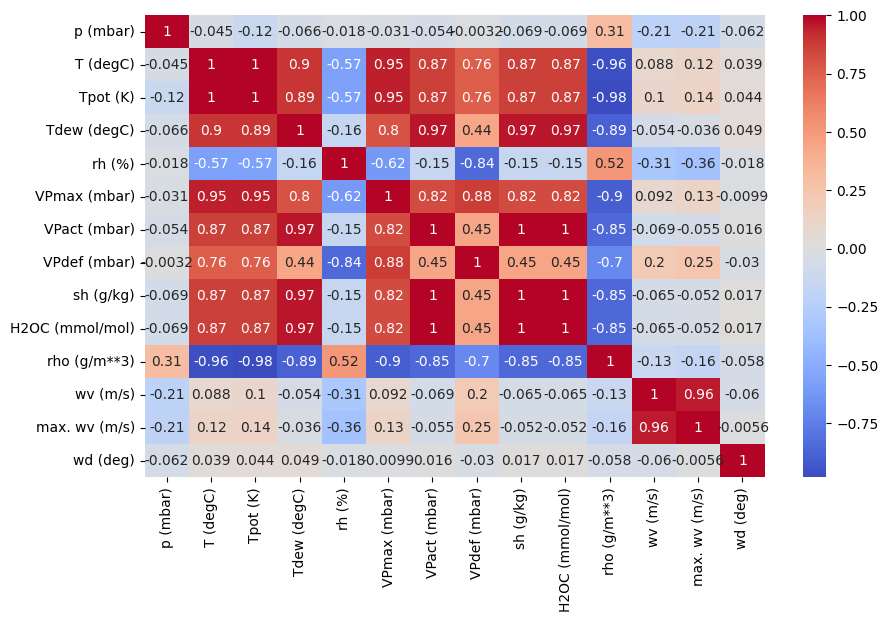

In [60]:
corelation=df_every_two_hours_after_drop.corr()
sns.heatmap(corelation,annot=True ,cmap='coolwarm')

In [62]:
train_df_drop=train_df.drop(['Date Time'],axis=1)
validate_df_drop=validate_df.drop(['Date Time'],axis=1)
test_df_drop=test_df.drop(['Date Time'],axis=1)

In [63]:
train_mean=train_df_drop.mean()
train_std=train_df_drop.std()


train_df_drop=(train_df_drop-train_mean)/train_std
validate_df_drop=(validate_df_drop-train_mean)/train_std
test_df_drop=(test_df_drop-train_mean)/train_std

In [65]:
df_every_two_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35045 entries, 11 to 420539
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date Time        35045 non-null  object 
 1   p (mbar)         35045 non-null  float64
 2   T (degC)         35045 non-null  float64
 3   Tpot (K)         35045 non-null  float64
 4   Tdew (degC)      35045 non-null  float64
 5   rh (%)           35045 non-null  float64
 6   VPmax (mbar)     35045 non-null  float64
 7   VPact (mbar)     35045 non-null  float64
 8   VPdef (mbar)     35045 non-null  float64
 9   sh (g/kg)        35045 non-null  float64
 10  H2OC (mmol/mol)  35045 non-null  float64
 11  rho (g/m**3)     35045 non-null  float64
 12  wv (m/s)         35045 non-null  float64
 13  max. wv (m/s)    35045 non-null  float64
 14  wd (deg)         35045 non-null  float64
dtypes: float64(14), object(1)
memory usage: 4.0+ MB


In [15]:
hour=date_time.dt.hour

In [16]:
hour

0          0
1          0
2          0
3          0
4          0
          ..
420546    23
420547    23
420548    23
420549    23
420550     0
Name: Date Time, Length: 420551, dtype: int32

In [17]:
minute=date_time.dt.minute

In [18]:
minute

0         10
1         20
2         30
3         40
4         50
          ..
420546    20
420547    30
420548    40
420549    50
420550     0
Name: Date Time, Length: 420551, dtype: int32

In [29]:
df_every_hour['day']=date_time.dt.day

In [22]:
day

0          1
1          1
2          1
3          1
4          1
          ..
420546    31
420547    31
420548    31
420549    31
420550     1
Name: Date Time, Length: 420551, dtype: int32

In [30]:
df['month']=date_time.dt.month

In [24]:
month

0          1
1          1
2          1
3          1
4          1
          ..
420546    12
420547    12
420548    12
420549    12
420550     1
Name: Date Time, Length: 420551, dtype: int32

In [31]:
df['year']=date_time.dt.year

In [26]:
year

0         2009
1         2009
2         2009
3         2009
4         2009
          ... 
420546    2016
420547    2016
420548    2016
420549    2016
420550    2017
Name: Date Time, Length: 420551, dtype: int32

In [32]:
df.shape

(420551, 18)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
 15  day              420551 non-null  int32  
 16  month            420551 non-null  int3

In [34]:
df_after_drop=df.drop(['Date Time'],axis=1)

In [36]:
df_after_drop.shape

(420551, 17)

In [40]:
mpl.rcParams['figure.figsize']=(20,10)
mpl.rcParams['axes.grid']=False

<Axes: >

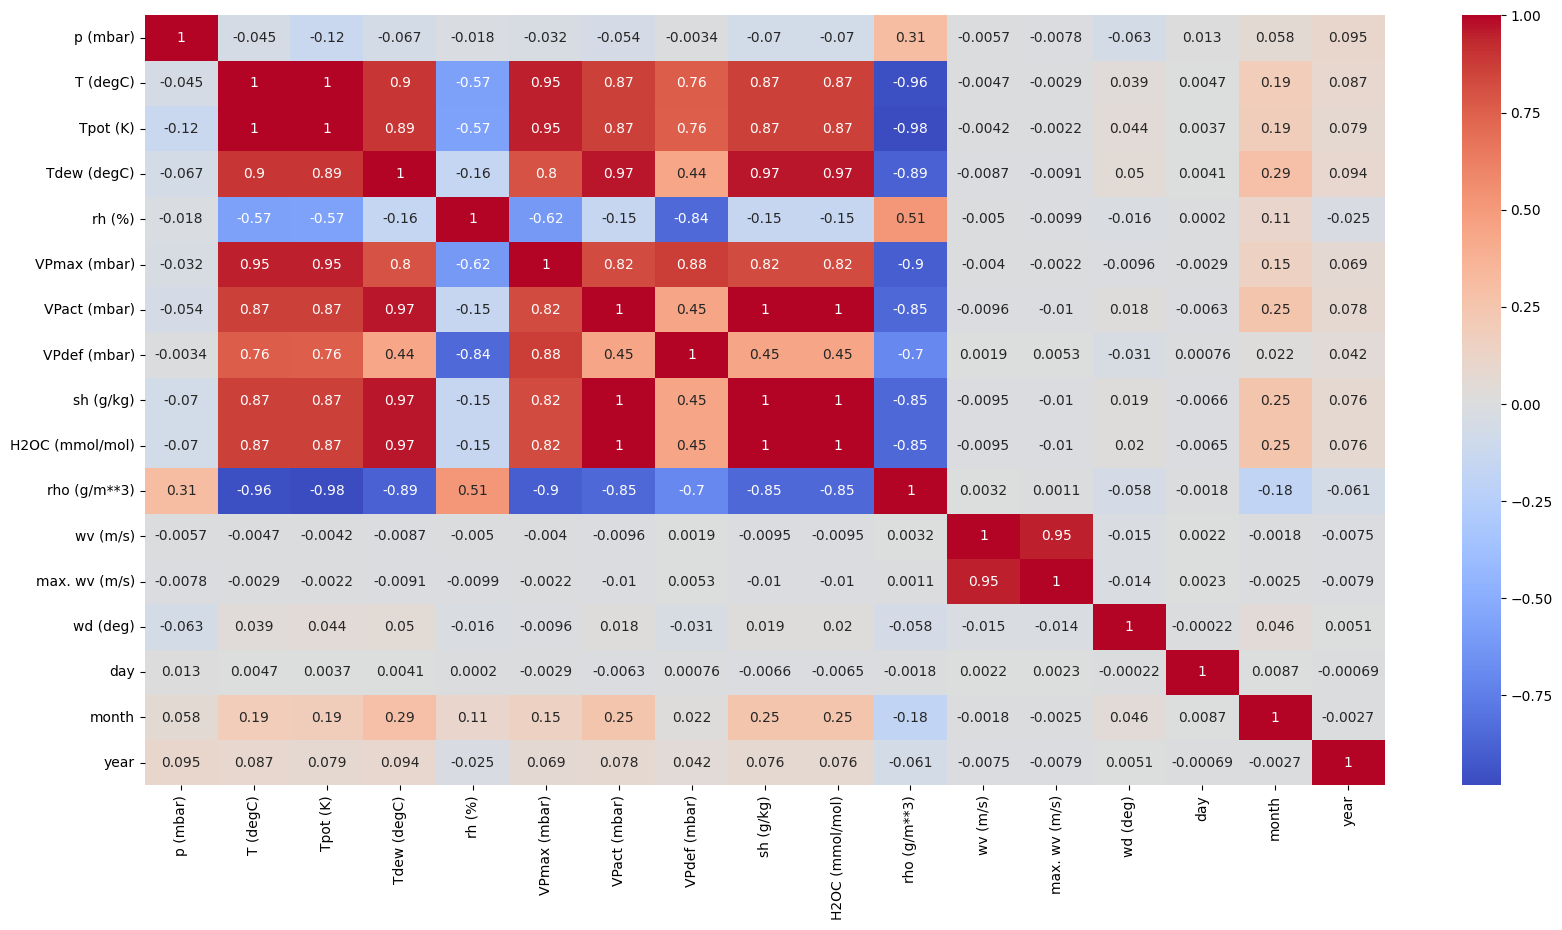

In [41]:
corelation=df_after_drop.corr()
sns.heatmap(corelation,annot=True ,cmap='coolwarm')

In [42]:
df_after_drop.columns

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
columns_to_be_drop=['wv (m/s)','max. wv (m/s)','wd (deg)']

In [ ]:
df_after_corr=df_after_drop.drop()

In [6]:
df_every_hour=df[5::6]
df_every_hour

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [7]:
df_every_hour.shape 

(70091, 15)

In [8]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [5]:
df_every_hour=df_every_hour.drop(['day', 'month', 'year'],axis=1)

NameError: name 'df_every_hour' is not defined

In [9]:
df_every_hour.shape

(70091, 15)

In [10]:
df_every_hour.index=pd.to_datetime(df_every_hour['Date Time'],format="%d.%m.%Y %H:%M:%S")

In [11]:
df_every_hour.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [12]:
temp=df_every_hour['T (degC)']

In [13]:
temp

Date Time
2009-01-01 01:00:00   -8.05
2009-01-01 02:00:00   -8.88
2009-01-01 03:00:00   -8.81
2009-01-01 04:00:00   -9.05
2009-01-01 05:00:00   -9.63
                       ... 
2016-12-31 19:10:00   -0.98
2016-12-31 20:10:00   -1.40
2016-12-31 21:10:00   -2.75
2016-12-31 22:10:00   -2.89
2016-12-31 23:10:00   -3.93
Name: T (degC), Length: 70091, dtype: float64

In [14]:
temp

Date Time
2009-01-01 01:00:00   -8.05
2009-01-01 02:00:00   -8.88
2009-01-01 03:00:00   -8.81
2009-01-01 04:00:00   -9.05
2009-01-01 05:00:00   -9.63
                       ... 
2016-12-31 19:10:00   -0.98
2016-12-31 20:10:00   -1.40
2016-12-31 21:10:00   -2.75
2016-12-31 22:10:00   -2.89
2016-12-31 23:10:00   -3.93
Name: T (degC), Length: 70091, dtype: float64

In [15]:
# temp.to_csv('temp.csv')

<Axes: xlabel='Date Time'>

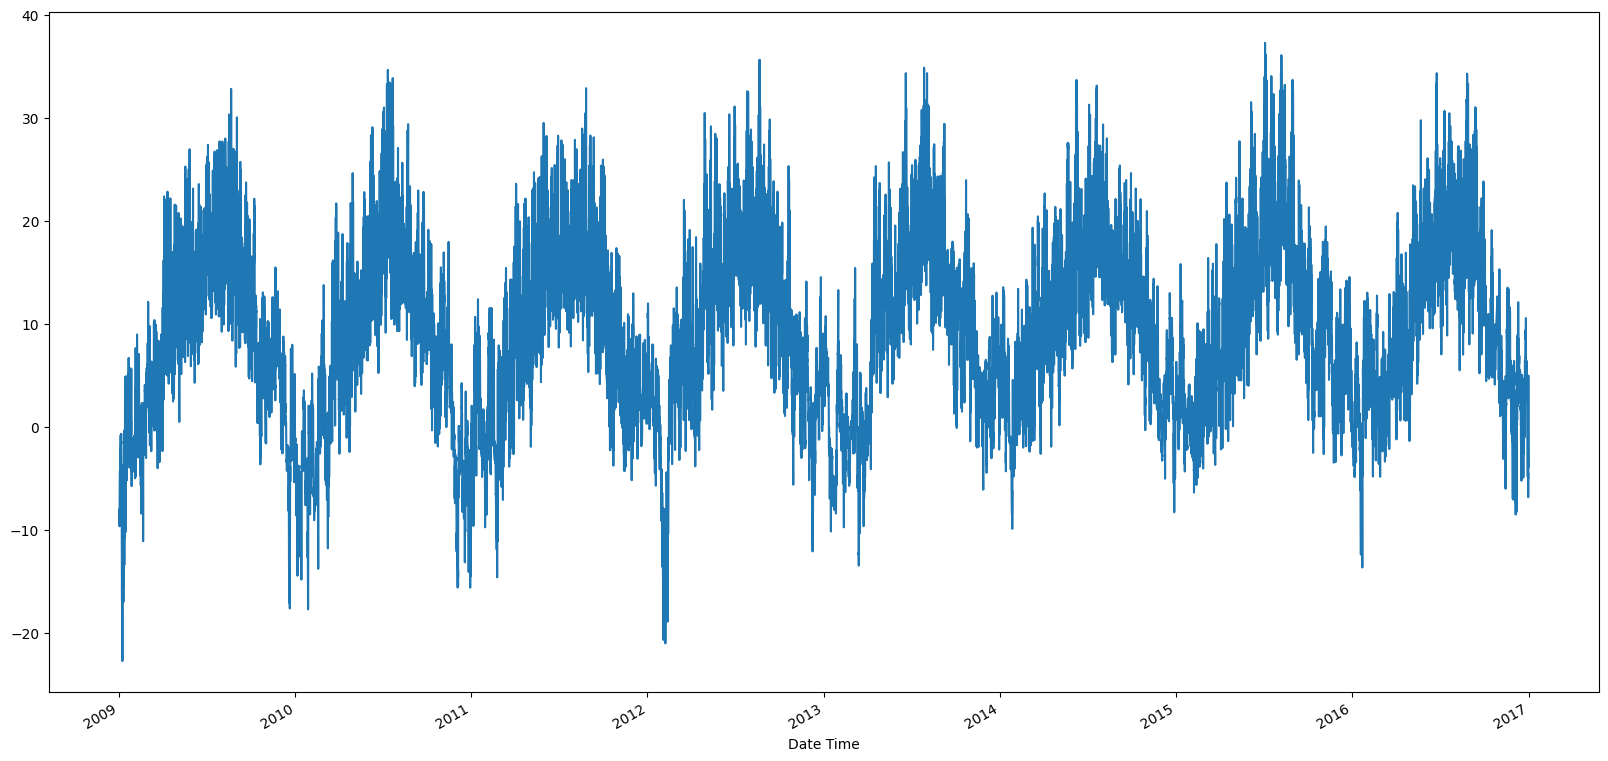

In [57]:
temp.plot()

In [58]:
#[[[1],[2],[3],[4],[5]]] [6]

def df_to_X_y(df_every_hour,window_size=5):
    df_as_np=df_every_hour.to_numpy()
    X=[]
    y=[]
    for i in range(len(df_as_np)-window_size):
        row=[[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label=df_as_np[i+5]
        y.append(label)
    return np.array(X),np.array(y)
    

In [60]:
window_size=5;
X,y=df_to_X_y(temp,window_size)
X.shape, y.shape

((70086, 5, 1), (70086,))

In [61]:
X

array([[[-8.05],
        [-8.88],
        [-8.81],
        [-9.05],
        [-9.63]],

       [[-8.88],
        [-8.81],
        [-9.05],
        [-9.63],
        [-9.67]],

       [[-8.81],
        [-9.05],
        [-9.63],
        [-9.67],
        [-9.17]],

       ...,

       [[ 2.44],
        [ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ]],

       [[ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75]],

       [[-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75],
        [-2.89]]])

In [62]:
y

array([-9.67, -9.17, -8.1 , ..., -2.75, -2.89, -3.93])

In [63]:
X_train,y_train=X[:60000],y[:60000]
X_val,y_val=X[60000:65000],y[60000:65000]
X_test,y_test=X[65000:],y[65000:]

X_train.shape

(60000, 5, 1)

In [73]:
X_train

array([[[-8.05],
        [-8.88],
        [-8.81],
        [-9.05],
        [-9.63]],

       [[-8.88],
        [-8.81],
        [-9.05],
        [-9.63],
        [-9.67]],

       [[-8.81],
        [-9.05],
        [-9.63],
        [-9.67],
        [-9.17]],

       ...,

       [[ 2.02],
        [ 2.27],
        [ 4.71],
        [ 6.07],
        [ 9.88]],

       [[ 2.27],
        [ 4.71],
        [ 6.07],
        [ 9.88],
        [13.53]],

       [[ 4.71],
        [ 6.07],
        [ 9.88],
        [13.53],
        [15.43]]])

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [67]:
model1 =Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8,'relu'))
model1.add(Dense(1,'linear'))

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
cp=ModelCheckpoint('model1.keras',save_best_only=True)
model1.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [70]:
model1.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10,callbacks=[cp])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 72.5349 - root_mean_squared_error: 8.2909 - val_loss: 1.3040 - val_root_mean_squared_error: 1.1419
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.7857 - root_mean_squared_error: 1.6609 - val_loss: 0.6609 - val_root_mean_squared_error: 0.8130
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.0229 - root_mean_squared_error: 1.0108 - val_loss: 0.5722 - val_root_mean_squared_error: 0.7565
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.7624 - root_mean_squared_error: 0.8729 - val_loss: 0.5208 - val_root_mean_squared_error: 0.7217
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.6831 - root_mean_squared_error: 0.8265 - val_loss: 0.5031 - val_root_mean_squared_error: 0.7093
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.6604 - root_mean_squared_error: 0.8126 - val_loss: 0.5028 - val_root_mean_squared_error: 0.7091
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━

In [71]:
from tensorflow.keras.models import load_model
model1=load_model('model1.keras')

In [72]:
train_predictions=model1.predict(X_train).flatten()
train_results=pd.DataFrame(data={'Train prediction':train_predictions,'actual':y_train})
train_results

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


,Train prediction,actual
0,-9.828277,-9.67
1,-9.637867,-9.17
2,-8.772740,-8.10
3,-7.339921,-7.66
4,-7.220508,-7.04
...,...,...
59995,6.008692,6.07
59996,7.195609,9.88
59997,12.125019,13.53
59998,15.762527,15.43


In [16]:
df_every_hour

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


In [32]:
df_every_hour_rf=pd.DataFrame({'Temp':df_every_hour['T (degC)']})

In [33]:
df_every_hour_rf

,Temp
Date Time,
2009-01-01 01:00:00,-8.05
2009-01-01 02:00:00,-8.88
2009-01-01 03:00:00,-8.81
2009-01-01 04:00:00,-9.05
2009-01-01 05:00:00,-9.63
...,...
2016-12-31 19:10:00,-0.98
2016-12-31 20:10:00,-1.40
2016-12-31 21:10:00,-2.75


In [34]:
df_every_hour_rf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70091 entries, 2009-01-01 01:00:00 to 2016-12-31 23:10:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    70091 non-null  float64
dtypes: float64(1)
memory usage: 3.1 MB


In [22]:
df_every_hour['Date Time']=pd.to_datetime(df_every_hour['Date Time'],format="%d.%m.%Y %H:%M:%S")

C:\Users\Singla\AppData\Local\Temp\ipykernel_23984\702568999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_every_hour['Date Time']=pd.to_datetime(df_every_hour['Date Time'],format="%d.%m.%Y %H:%M:%S")


In [35]:
df_every_hour_rf['month']=df_every_hour['Date Time'].dt.month

In [36]:
df_every_hour_rf.head()

,Temp,month
Date Time,,
2009-01-01 01:00:00,-8.05,1
2009-01-01 02:00:00,-8.88,1
2009-01-01 03:00:00,-8.81,1
2009-01-01 04:00:00,-9.05,1
2009-01-01 05:00:00,-9.63,1


In [37]:
df_every_hour_rf['day']=df_every_hour['Date Time'].dt.day

In [38]:
df_every_hour_rf['year']=df_every_hour['Date Time'].dt.year

In [39]:
df_every_hour_rf['hour']=df_every_hour['Date Time'].dt.hour

In [40]:
df_every_hour_rf

,Temp,month,day,year,hour
Date Time,,,,,
2009-01-01 01:00:00,-8.05,1,1,2009,1
2009-01-01 02:00:00,-8.88,1,1,2009,2
2009-01-01 03:00:00,-8.81,1,1,2009,3
2009-01-01 04:00:00,-9.05,1,1,2009,4
2009-01-01 05:00:00,-9.63,1,1,2009,5
...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,12,31,2016,19
2016-12-31 20:10:00,-1.40,12,31,2016,20
2016-12-31 21:10:00,-2.75,12,31,2016,21


In [41]:
df_every_hour_rf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70091 entries, 2009-01-01 01:00:00 to 2016-12-31 23:10:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    70091 non-null  float64
 1   month   70091 non-null  int32  
 2   day     70091 non-null  int32  
 3   year    70091 non-null  int32  
 4   hour    70091 non-null  int32  
dtypes: float64(1), int32(4)
memory usage: 4.2 MB


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [43]:
y=df_every_hour_rf['Temp']

In [44]:
y.shape 

(70091,)

In [45]:
X=df_every_hour_rf.drop(['Temp'],axis=1)

In [46]:
X

,month,day,year,hour
Date Time,,,,
2009-01-01 01:00:00,1,1,2009,1
2009-01-01 02:00:00,1,1,2009,2
2009-01-01 03:00:00,1,1,2009,3
2009-01-01 04:00:00,1,1,2009,4
2009-01-01 05:00:00,1,1,2009,5
...,...,...,...,...
2016-12-31 19:10:00,12,31,2016,19
2016-12-31 20:10:00,12,31,2016,20
2016-12-31 21:10:00,12,31,2016,21


In [47]:
X_train_rf=X[:50000]
X_test_rf=X[50000:]
y_train_rf=y[:50000]
y_test_rf=y[50000:]

In [58]:
model2 = RandomForestRegressor(n_estimators=500, random_state=0,criterion='squared_error',max_depth=15,min_samples_split=250,min_samples_leaf=200)

In [59]:
model2.fit(X_train_rf, y_train_rf)

# Make predictions on the test data
predictions = model2.predict(X_test_rf)

# Evaluate the model performance (optional)
mse = mean_squared_error(y_test_rf, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 19.953220023659618


In [63]:
predictions

array([13.03743009, 13.03540572, 13.03540572, ...,  4.82809778,
        4.82809778,  4.82809778])

In [60]:
import pickle


In [62]:
filename = "model2.pkl"
pickle.dump(model2, open(filename, "wb"))